<a href="https://colab.research.google.com/github/sanenchan/SistemCerdas/blob/main/sentiment/analisis_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
consumer_key = "77FBm5yhuqaut06hqozP8O8EV"
consumer_secret_key ="g1KgZvx5uNWsxJE3wLVvwMYXlEHIYcPOmrBIwaIbbGmalr327T"
access_token = "1295686074971254784-MXtqxjOUQTiuqbApfUVFNcoe9xCPVb"
access_token_secret = "1I64e9Ch3n0vJSK8dEyVMMrFeskUovU7NXqxhQTOBml2i"

auth = tweepy.OAuthHandler(consumer_key,consumer_secret_key)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True) 

In [8]:

post = api.user_timeline(screen_name="pilkada", count= 100, lang="en", tweet_mode="extended")

#print the last 5 tweet
print("show the 5 recents tweets: \n")

i = 1
for tweet in post[:5]:
    print(str(i)+') '+tweet.full_text + '\n')
    i = i+1

show the 5 recents tweets: 

1) Google Alerts RSS delivery is temporarily not available. If you would like to continue receiving Google Alerts ...

2) BUKTI2 PELANGGARAN PNS DLAM PILKADA PPU http://t.co/FrGXDNQvEK http://t.co/NnWwpIeqZa

3) Google Reader is no longer available. To continue receiving Google Alerts, go to http://t.co/8pnJPmEA3a...

4) Hitung Cepat Pilkada Kota Bandung, Calon PKS-Gerindra Unggul. Pasangan Ridwan ...www.youtube.com/watch?v=wHWCCz8KeyI http://t.co/fGL7EfZTbm

5) Powerful Presentations Herman - Daud http://t.co/GVSvFvdln4 http://t.co/fbfuSmC1gd



In [9]:
df = pd.DataFrame([tweet.full_text for tweet in post], columns = ["Tweets"])
df.head()

,Tweets
0,Google Alerts RSS delivery is temporarily not ...
1,BUKTI2 PELANGGARAN PNS DLAM PILKADA PPU http:/...
2,Google Reader is no longer available. To conti...
3,"Hitung Cepat Pilkada Kota Bandung, Calon PKS-G..."
4,Powerful Presentations Herman - Daud http://t....


In [11]:
def cleanText(teks):
    teks = re.sub('@[A-Za-z0-9]+', '',teks)  #hapus @
    teks = re.sub(r'#([^\s]+)', r'\1', teks) #hapus #tagger
    teks = re.sub('RT[\s]+', '',teks)#hapus RT
    teks = re.sub('https?:\/\/\S+', '',teks)#hapus hyperlink
    teks = teks.lower() #ubah jadi lower case
    return teks

#Apply function on review column
df["Tweets"] = df["Tweets"].apply(cleanText)

df

,Tweets
0,google alerts rss delivery is temporarily not ...
1,bukti2 pelanggaran pns dlam pilkada ppu
2,google reader is no longer available. to conti...
3,"hitung cepat pilkada kota bandung, calon pks-g..."
4,powerful presentations herman - daud
...,...
95,"jual: spanduk pilkada, umbul-umbul, bendera..m..."
96,prijanto saya tak akan ikut pilkada. fullscree...
97,"the state news agency antara, quotes “cok ace”..."
98,buy hasilpilkada just $0.11 per track full alb...


In [13]:
def getSubjecttivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjecttivity']=df['Tweets'].apply(getSubjecttivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df


,Tweets,Subjecttivity,Polarity
0,google alerts rss delivery is temporarily not ...,0.400000,-0.200000
1,bukti2 pelanggaran pns dlam pilkada ppu,0.000000,0.000000
2,google reader is no longer available. to conti...,0.400000,0.400000
3,"hitung cepat pilkada kota bandung, calon pks-g...",0.000000,0.000000
4,powerful presentations herman - daud,1.000000,0.300000
...,...,...,...
95,"jual: spanduk pilkada, umbul-umbul, bendera..m...",0.000000,0.000000
96,prijanto saya tak akan ikut pilkada. fullscree...,0.000000,0.000000
97,"the state news agency antara, quotes “cok ace”...",0.000000,0.000000
98,buy hasilpilkada just $0.11 per track full alb...,0.431145,0.110269


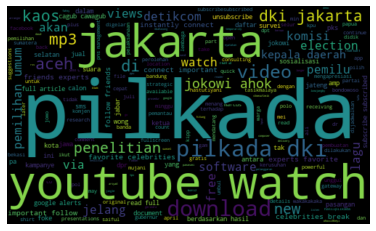

In [14]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
def getAnalysisSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
        
df['Analysis'] = df['Polarity'].apply(getAnalysisSentiment)

df

,Tweets,Subjecttivity,Polarity,Analysis
0,google alerts rss delivery is temporarily not ...,0.400000,-0.200000,Negative
1,bukti2 pelanggaran pns dlam pilkada ppu,0.000000,0.000000,Neutral
2,google reader is no longer available. to conti...,0.400000,0.400000,Positive
3,"hitung cepat pilkada kota bandung, calon pks-g...",0.000000,0.000000,Neutral
4,powerful presentations herman - daud,1.000000,0.300000,Positive
...,...,...,...,...
95,"jual: spanduk pilkada, umbul-umbul, bendera..m...",0.000000,0.000000,Neutral
96,prijanto saya tak akan ikut pilkada. fullscree...,0.000000,0.000000,Neutral
97,"the state news agency antara, quotes “cok ace”...",0.000000,0.000000,Neutral
98,buy hasilpilkada just $0.11 per track full alb...,0.431145,0.110269,Positive


In [21]:

print('Printing negative tweets: \n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #sorting tweets
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j)+ ') '+sortedDF["Tweets"][i])
        print()
        j = j+1

Printing negative tweets: 

1) google alerts rss delivery is temporarily not available. if you would like to continue receiving google alerts ...

2) a comment on jg website on pilkada jakarta: and i thought that the obama vs romney drama in the us is bad enough... 



In [22]:
print('Printing positive tweets: \n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #sorting tweets
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j)+ ') '+sortedDF["Tweets"][i])
        print()
        j = j+1

Printing positive tweets: 

1) google reader is no longer available. to continue receiving google alerts, go to 

2) powerful presentations herman - daud  

3) powerful presentations tgb - amin ntb  

4) [download file] lagu pilkada jokowi ahok free download mp3, gratis download lagu lagu pilkada jokowi ahok you ... 

5) [download file] pilkada jakarta plus busway free download mp3, gratis download lagu pilkada jakarta plus buswa... 

6) canda saat pilkada dki jakarta 2012 setelah hasil quick count menunjukan jokowi-ahok menang 43 % suara lawan fok... 

7) free pilkada tasikmalaya mp3 download, you just click on the download link. easy way to take pilkada tasikmalaya... 

8) instantly connect to what's most important to you. follow your friends, experts, favorite celebrities, and break... 

9) kaos pilkada 1 - solve this fun kaos pilkada puzzle and win! at  

10) instantly connect to what's most important to you. follow your friends, experts, favorite celebrities, and break... 

11) in

In [23]:
print('Printing neutral tweets: \n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #sorting tweets
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Neutral'):
        print(str(j)+ ') '+sortedDF["Tweets"][i])
        print()
        j = j+1

Printing neutral tweets: 

1) bukti2 pelanggaran pns dlam pilkada ppu  

2) hitung cepat pilkada kota bandung, calon pks-gerindra unggul. pasangan ridwan ...www.youtube.com/watch?v=whwccz8keyi 

3) 1:58. watch later demo pilkada lumajangby mbahasong no views · 1:38. watch ...www.youtube.com/watch?v=v5mesofzeik 

4) pilkada sumsel, tps tak kesulitan prosedur 2  

5) listen to jingle pilkada bandung - fahmy arsyad said by pamanami: pembuatan : april 2013 composer &amp; arranger :... 

6) kpud nyatakan pasangan pastika-sudikerta menang pilkada bali [27 mei 2013] 

7) rencananya pilkada gubernur jateng ini akan digelar esok, minggu (25/05/13). sehari ...www.youtube.com/watch?v... 

8)  hari ini minggu, 26 mei 2013, 27 juta warga jawa ...www.youtube.com/watch?v=jsq... 

9) dpr mengapresiasi kesiapan komisi pemilihan umum provinsi jawa tengah untuk ...www.youtube.com/watch?v=dghooi9nbky 

10) pilkada bondowoso is on facebook. join facebook to connect with pilkada bondowoso and others you may

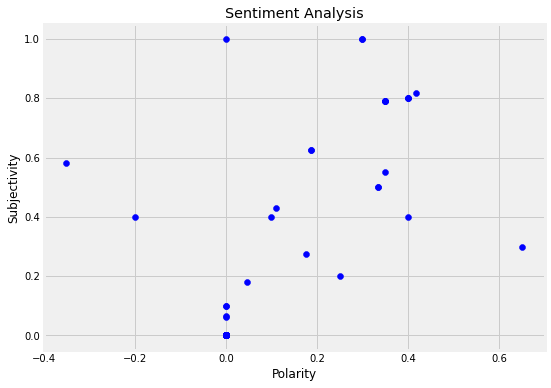

In [25]:

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjecttivity"][i], color="Blue")
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [26]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets["Tweets"]
ntweets

round( (ntweets.shape[0] /  df.shape[0]) * 100,1)

2.0

In [27]:

df['Analysis'].value_counts()

Neutral     76
Positive    22
Negative     2
Name: Analysis, dtype: int64

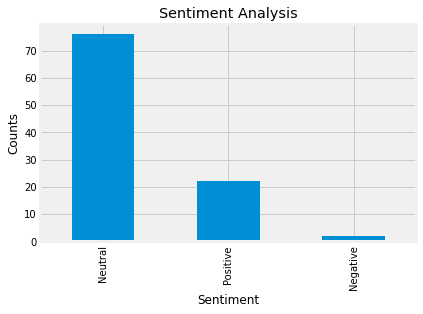

In [28]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind ='bar')
plt.show()

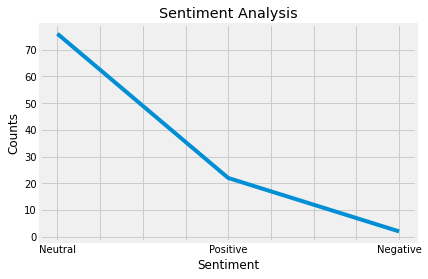

In [29]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind ='line')
plt.show()